In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
beta = 100. # inverse temperature
t = 1. # energy scale for cubic lattice
D = 1. # energy scale for bethe lattice

Loading DMFTlib module:

In [3]:
import DMFTlib
DMFTlib.initialize(beta_value=beta, bethe_lattice_D=D)

In [4]:
N = 500 # number of imaginary frequencies
tau = DMFTlib.matsubara_time(N) # discrete points in imaginary time
dtau = beta/N
freq = DMFTlib.matsubara_freq(N) # matsubara frequencies, ordered according to np.fft

In [32]:
# fit various Green's functions and plot the spectral function
G0 = 1. / ( 1j*freq + 2. )
Glocs = []
U_list = np.array([0.2,0.6,1.,1.45,1.9,5.])
numiter = 100
for U in U_list:
    g_0 = G0
    g_0, g_loc = DMFTlib.DMFT_loop(g_0,U,iterations=numiter,frac_new=0.7)
    Glocs.append(g_loc)

In [65]:
step = 10
filter_index = np.zeros_like(freq,dtype=np.bool)
filter_index[::step] = True
filter_index = np.logical_and(filter_index,freq>0,freq<0.9*freq.max())


how this filter works:

In [66]:
filter2 = np.array([True, True, False])
x = np.array([1,2,3])
x[filter2]

array([1, 2])

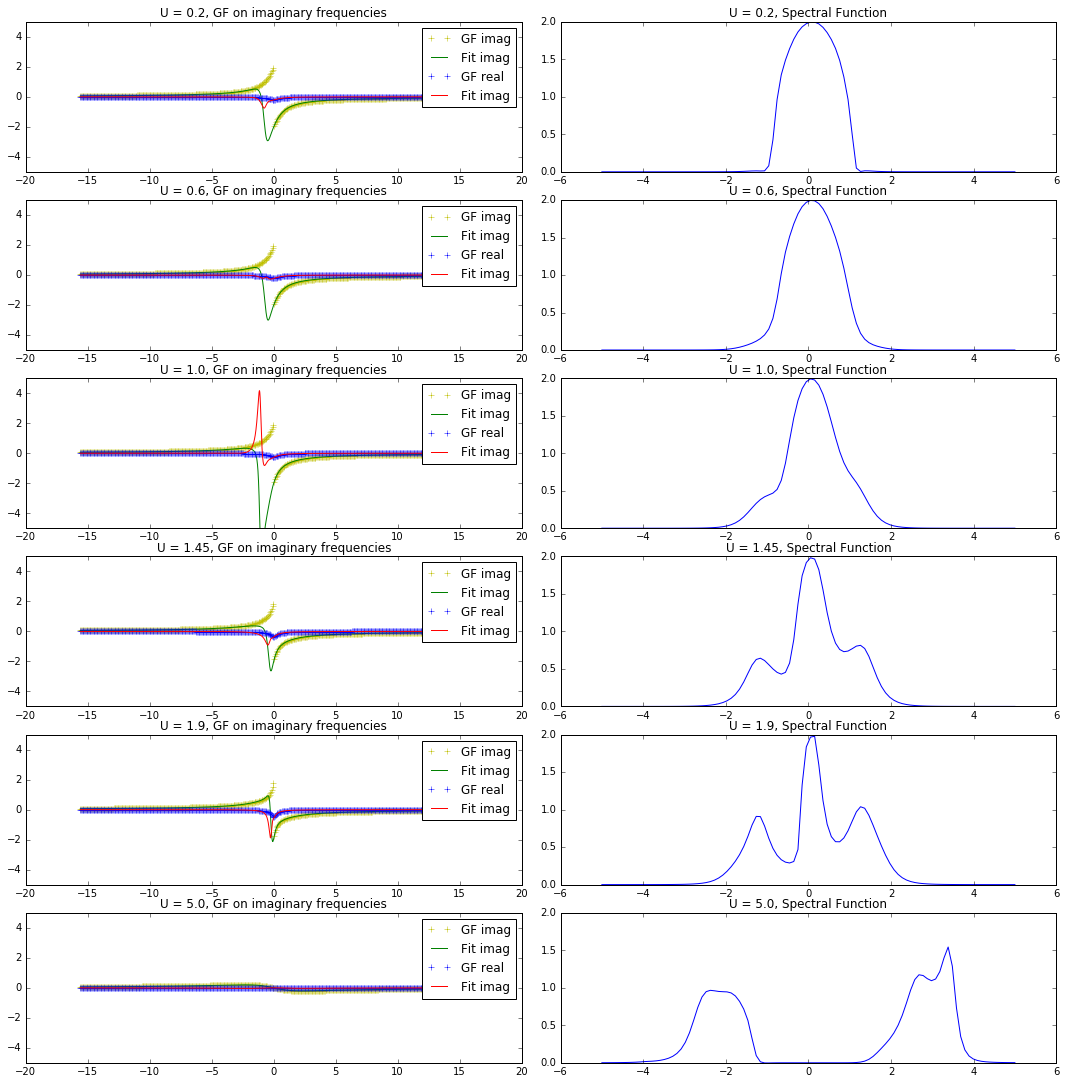

In [67]:
eta = 1e-4
plot_freq = np.linspace(-5.,5.,100)
my_freq = plot_freq + eta*1j

fig, ax = plt.subplots(nrows=len(Glocs),ncols=2,figsize=(15,15))
fig.tight_layout()
for index, gf in enumerate(Glocs):
    padeapp = DMFTlib.PadeApproximation(1j*freq,gf,filter_index=filter_index)
    spectral_func = -padeapp(my_freq).imag
    fit_plot_freq = np.linspace(freq.min(),freq.max(),5000)
    fit_func = padeapp(1j*fit_plot_freq)
    ax[index,0].set_title("U = {}, GF on imaginary frequencies".format(U_list[index]))
    ax[index,0].plot(freq,gf.imag,'y+',label="GF imag")
    ax[index,0].plot(fit_plot_freq,fit_func.imag,'g-',label="Fit imag")
    ax[index,0].plot(freq,gf.real,'b+',label="GF real")
    ax[index,0].plot(fit_plot_freq,fit_func.real,'r-',label="Fit imag")
    ax[index,0].set_ylim(-5,5)
    ax[index,0].legend()  
    ax[index,1].set_title("U = {}, Spectral Function".format(U_list[index]))
    ax[index,1].plot(plot_freq,spectral_func,'-')
    ax[index,1].set_ylim(0,2)